In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [5]:
#Importing all necessary libries
import pandas as pd
import re
import numpy as np
from textblob import TextBlob
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [7]:
data=pd.read_csv('/content/drive/My Drive/covid19 twiiter/main_dataset.csv',index_col=0)

In [8]:
data.head()

,user_id,screen_name,text
5,15872418.0,ABSCBNNews,G20 agrees to debt relief for poorest countrie...
7,171548670.0,RadioNLNews,B.C. health officials are urging people to kin...
9,23517017.0,953WDAE,The Lovely Lisa Ann Joins The Show LIVE From N...
10,613510703.0,matanock,@allisonnamias @ArriolaLR As @ethanbdm referen...
11,38489678.0,JAMA_current,Study suggests higher rates of co-infection be...


In [9]:
#droping all columns except text column
df=data.drop(['user_id','screen_name'], axis = 1) 

In [10]:
#reset the index
df.reset_index(inplace = True) 

In [11]:
df.drop(['index'],axis=1,inplace=True)

In [12]:
df.shape

(357526, 1)

In [13]:
#Clean text
#function for cleaning text
def cleanText(text):
    text=re.sub(r'@[A-Za-z0-9]+','',text) 
    text=re.sub(r'#','',text)
    text=re.sub(r'RT[\s]+','',text)
    text=re.sub(r'https?:\/\/\S+','',text)
    
    return text

df['text']=df['text'].apply(cleanText)

In [14]:
df.head()

,text
0,G20 agrees to debt relief for poorest countrie...
1,B.C. health officials are urging people to kin...
2,The Lovely Lisa Ann Joins The Show LIVE From N...
3,"As referenced, just saw this op-ed version ..."
4,Study suggests higher rates of co-infection be...


In [15]:
# Create a function to get subjectivity and polarity

def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

#Create a function to get polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

#create two new ccolumns

df['Subjectivity']=df['text'].apply(getSubjectivity)
df['Polarity']=df['text'].apply(getPolarity)

In [16]:
df.head()

,text,Subjectivity,Polarity
0,G20 agrees to debt relief for poorest countrie...,0.000000,0.000000
1,B.C. health officials are urging people to kin...,0.900000,0.600000
2,The Lovely Lisa Ann Joins The Show LIVE From N...,0.625000,0.356534
3,"As referenced, just saw this op-ed version ...",0.000000,0.000000
4,Study suggests higher rates of co-infection be...,0.347222,-0.013889


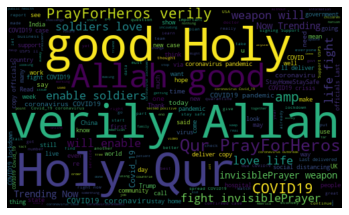

In [17]:
#Ploting Word cloud
allWords=''.join([twts for twts in df['text']])
wordCloud=WordCloud(width=500,height=300,random_state=21,max_font_size=119).generate(allWords)
plt.imshow(wordCloud,interpolation='bilinear')
plt.axis('off')
plt.show()

In [18]:
# Create function to compute the negative ,neutral and positive analysis
def getAnalysis(score):
    if score <0:
        return 'Negative'
    elif score ==0:
        return 'Neutral'
    else:
        return 'Positive'
df['Analysis']=df['Polarity'].apply(getAnalysis)

In [19]:
df

,text,Subjectivity,Polarity,Analysis
0,G20 agrees to debt relief for poorest countrie...,0.000000,0.000000,Neutral
1,B.C. health officials are urging people to kin...,0.900000,0.600000,Positive
2,The Lovely Lisa Ann Joins The Show LIVE From N...,0.625000,0.356534,Positive
3,"As referenced, just saw this op-ed version ...",0.000000,0.000000,Neutral
4,Study suggests higher rates of co-infection be...,0.347222,-0.013889,Negative
...,...,...,...,...
357521,can you blast this out? \nIt shows 2 things...,0.050000,0.000000,Neutral
357522,Today \n\nand met with the Forum to explore h...,0.575000,0.287500,Positive
357523,So proud of my team for delivering a town ha...,1.000000,1.000000,Positive
357524,As our national government is working to respo...,0.250000,0.250000,Positive


## Ploting Polarity vs Subjectivity

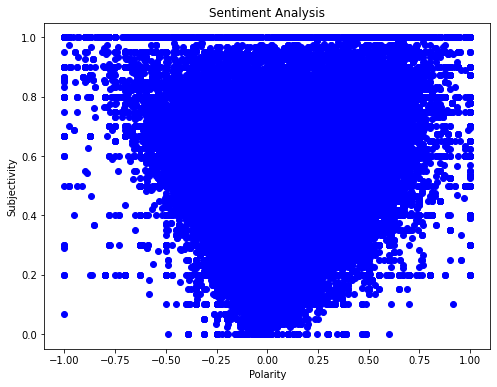

In [20]:
plt.figure(figsize=(8,6))
#for i in range(0,clean_data.shape[0]):
plt.scatter(df['Polarity'],df['Subjectivity'],color='Blue')
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

In [22]:
# Get  the  percentage of positive tweets...........
ptweets=df[df.Analysis=='Positive']
ptweets=ptweets['text']
round((ptweets.shape[0]/df.shape[0]) *100 , 1)

54.0

In [23]:
# Get  the  percentage of negetive tweets...........
ntweets=df[df.Analysis=='Negative']
ntweets=ntweets['text']
round((ntweets.shape[0]/df.shape[0]) *100 , 1)

16.0

In [25]:
# value counts
df['Analysis'].value_counts()

Positive    193013
Neutral     107466
Negative     57047
Name: Analysis, dtype: int64

# Ploting the Positive ,negative and neutral sentiment

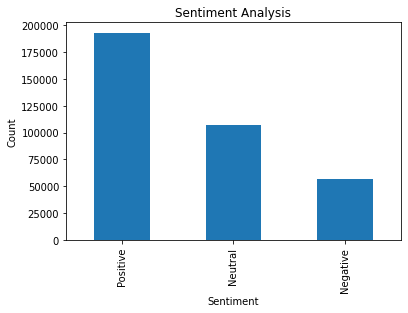

In [26]:
#plot and visualize the counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Count')
df['Analysis'].value_counts().plot(kind='bar')
plt.show()